In [1]:
from sklearn import tree
from sklearn import model_selection
from sklearn import preprocessing
from id3 import Id3Estimator
from id3 import export_graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.read_csv(url,names=names)

In [3]:
dataset.shape

(150, 5)

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

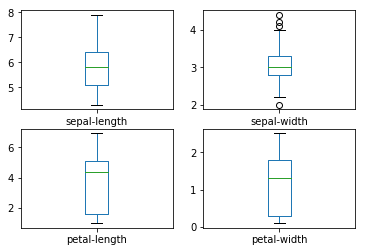

In [6]:
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)

In [7]:
data_inputs = dataset [['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].values
data_classes = dataset['species'].values
(trainset, testset, trainclass, testclass) = model_selection.train_test_split(data_inputs, data_classes, train_size=0.7, random_state=1)

In [8]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(trainset, trainclass)
dtc.score(testset, testclass)

0.9555555555555556

In [9]:
tree.export_text(dtc)

'|--- feature_3 <= 0.80\n|   |--- class: Iris-setosa\n|--- feature_3 >  0.80\n|   |--- feature_3 <= 1.65\n|   |   |--- feature_2 <= 5.00\n|   |   |   |--- class: Iris-versicolor\n|   |   |--- feature_2 >  5.00\n|   |   |   |--- feature_0 <= 6.05\n|   |   |   |   |--- class: Iris-versicolor\n|   |   |   |--- feature_0 >  6.05\n|   |   |   |   |--- class: Iris-virginica\n|   |--- feature_3 >  1.65\n|   |   |--- feature_2 <= 4.85\n|   |   |   |--- feature_1 <= 3.10\n|   |   |   |   |--- class: Iris-virginica\n|   |   |   |--- feature_1 >  3.10\n|   |   |   |   |--- class: Iris-versicolor\n|   |   |--- feature_2 >  4.85\n|   |   |   |--- class: Iris-virginica\n'

In [10]:
urlTennis = "https://raw.githubusercontent.com/sjwhitworth/golearn/master/examples/datasets/tennis.csv"
nameTennis = ['outlook', 'temp', 'humidity', 'windy', 'play']
dataSetTennis = pd.read_csv(urlTennis)

In [11]:
dataSetTennis.shape

(14, 5)

In [12]:
dataSetTennis.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,rainy,mild,normal,False,yes
freq,5,6,7,8,9


In [13]:
le = preprocessing.LabelEncoder()
dataSetTennis['outlook'] = le.fit_transform(dataSetTennis['outlook'])
dataSetTennis['temp'] = le.fit_transform(dataSetTennis['temp'])
dataSetTennis['humidity'] = le.fit_transform(dataSetTennis['humidity'])
dataSetTennis['windy'] = le.fit_transform(dataSetTennis['windy'])

In [14]:
dataSetTennis

,outlook,temp,humidity,windy,play
0,2,1,0,0,no
1,2,1,0,1,no
2,0,1,0,0,yes
3,1,2,0,0,yes
4,1,0,1,0,yes
5,1,0,1,1,no
6,0,0,1,1,yes
7,2,2,0,0,no
8,2,0,1,0,yes
9,1,2,1,0,yes


In [15]:
tennis_inputs = dataSetTennis[['outlook', 'temp', 'humidity', 'windy']].values
tennis_classes = dataSetTennis['play'].values
(tennistraining, tennistest, tennisclass, tennistestclass) = model_selection.train_test_split(tennis_inputs, tennis_classes, train_size=0.5, random_state=1)

In [16]:
dtcT = tree.DecisionTreeClassifier()
dtcT.fit(tennistraining, tennisclass)
dtcT.score(tennistest, tennistestclass)

0.7142857142857143

In [17]:
tree.export_text(dtcT)

'|--- feature_0 <= 0.50\n|   |--- class: yes\n|--- feature_0 >  0.50\n|   |--- feature_3 <= 0.50\n|   |   |--- feature_2 <= 0.50\n|   |   |   |--- class: no\n|   |   |--- feature_2 >  0.50\n|   |   |   |--- class: yes\n|   |--- feature_3 >  0.50\n|   |   |--- class: no\n'

In [18]:
estimator = Id3Estimator()
estimator = estimator.fit(trainset, trainclass)
tree = export_graphviz(estimator.tree_, 'treeIris.dot', names)

In [19]:
estimator = estimator.fit(tennistraining, tennisclass)
tree = export_graphviz(estimator.tree_, 'treeTennis.dot', nameTennis)

# Penentuan Atribut Terbaik

Pada algoritma **Decision Tree Learning** yang ada di buku **Machine Learning** karya Tom Mitchell, atribut yang dinilai sebagai atribut terbaik adalah atribut yang memiliki nilai *information gain* tertinggi. Maksudnya adalah atribut yang dinilai dapat memisahkan instan-instan paling baik, yang dapat dilihat dari nilai **entropi** hasil pemisahan oleh atribut tersebut. Ketika nilai entropi mendekati 0, maka instan-instan yang dipisahkan oleh atribut tersebut dipisahkan dengan sangat baik, sehingga tidak ada campur aduk antar instan yang seharusnya berada di kelas terpisah.

Adapun pada algoritma **ID3Estimator**, digunakan konsep yang sama dengan yang ada di buku tersebut, yaitu dengan melihat *information gain* dari tiap atribut lalu memilih atribut yang memiliki nilai paling tinggi. Algoritma pada buku **Machine Learning** memang didasarkan pada algoritma **ID3**, sehingga memiliki kesamaan metode penentuan atribut terbaik.

Pada algoritma **DTL** yang diimplentasikan oleh *library* **scikit-learn**, digunakan algoritma **CART** (Classification and Regression Trees). Pada algoritma ini, dibentuk suatu pohon biner menggunakan atribut pada data, dan ditentukan suatu batas yang menghasilkan nilai *information gain* terbesar pada tiap simpul pohon. Pada algoritma ini, digunakan nilai *gini* untuk menentukan pemisahan secara biner. Nilai *gini* tersebut memperhitungkan nilai *impurity* dari partisi yang dihasilkan oleh pemisahan secara biner berdasarkan tiap atribut yang tersedia. Setelah itu, dipilih atribut yang memiliki nilai *gini* terkecil sebagai simpul pemisah.

### Sumber:

- Mitchell, T. M. (1997). *Machine learning*. New York: McGraw Hill.
- Svaante. (2018, January 19). svaante/decision-tree-id3. Diakses melalui https://github.com/svaante/decision-tree-id3
- Decision Trees (n.d.). Diakses melalui https://scikit-learn.org/stable/modules/tree.html
- Decision Tree Classification in Python. (n.d.). Diakses melalui https://www.datacamp.com/community/tutorials/decision-tree-classification-python

# Penanganan Label dari Cabang Setiap Nilai Atribut

Pada algoritma **Decision Tree Learning** yang ada di buku **Machine Learning** karya Tom Mitchell, setelah ditentukan suatu atribut sebagai pemisah pada suatu simpul, algoritma lanjut membentuk simpul anak dari simpul tersebut. Ketika membuat simpul anak tersebut, apabila semua instan yang diklasifikasikan oleh atribut tersebut sudah memiliki label dari atribut target yang sama semua, maka simpul tersebut ditetapkan sebagai simpul daun dan tidak perlu diperdalam lagi. Hal tersebut dapat dilihat dari nilai *entropi* yang bernilai 0.

Pada algoritma **ID3Estimator**, cara penanganan yang digunakan mirip dengan algortima pada buku **Machine Learning**. Ketika suatu simpul berhasil memisahkan instan, yaitu nilai *entropi* 0, maka simpul tersebut ditetapkan sebagai daun dan simpul tersebut tidak diperdalam lagi.

Pada algortima **DTL** yang diimplementasikan oleh *library* **scikit-learn**, digunakan algoritma **CART** (Classification and Regression Trees). Seperti yang disebutkan sebelumnya, algoritma ini membentuk pohon biner. Adapun pada algoritma ini, instan-instan dibagi menjadi dua bagian, dengan cara memilih titik bagi yang menghasilkan nilai *entropi* paling rendah, sehingga pada salah satu bagian lansung terbentuk partisi yang memiliki *entropi* 0. Sehingga, pada tiap *level* simpul pada pohon, pasti ada label yang ditentukan. Untuk bagian lainnya yang memiliki nilai *entropi* > 0, pohon akan diperdalam lagi.

### Sumber:

- Mitchell, T. M. (1997). *Machine learning*. New York: McGraw Hill.
- Svaante. (2018, January 19). svaante/decision-tree-id3. Diakses melalui https://github.com/svaante/decision-tree-id3
- Decision Trees (n.d.). Diakses melalui https://scikit-learn.org/stable/modules/tree.html
- Decision Tree Classification in Python. (n.d.). Diakses melalui https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [31]:
import math

def getEnthropyHelper(data, targetAttribute, targetAttributeValue):
    count = 0
    for instance in data[targetAttribute]:
        if instance == targetAttributeValue:
            count += 1
    
    if count == 0:
        return 0

    return -count * math.log(count/len(data[targetAttribute]), 2) / len(data[targetAttribute])

def getEnthropy(data, targetAttribute, targetPossibleValues = None):
    if targetPossibleValues == None:
        targetPossibleValues = getPossibleValues(data, targetAttribute)
        
    sum = 0
    for value in targetPossibleValues:
        sum += getEnthropyHelper(data, targetAttribute, value)
    
    return sum

def getPossibleValues(data, attribute):
    possibleValues = []
    for instance in data[attribute]:
        if instance not in possibleValues:
            possibleValues.append(instance)
    
    return possibleValues

def getPossibleDivider(data, attribute):
    divider = []
    sortedData = sorted(data[attribute])
    for instance in range(len(sortedData) - 1):
        if sortedData[instance] != sortedData[instance + 1]:
            divider.append((sortedData[instance] + sortedData[instance + 1]) / 2)
            
    return divider
        

def divideData(data, chosenAttribute, chosenPossibleValues = None):
    if chosenPossibleValues == None:
        chosenPossibleValues = getPossibleValues(data, chosenAttribute)
    
    dividedData = []
    for value in chosenPossibleValues:
        indices = []
        dataWithValue = {}
        i = 0
        for instance in data[chosenAttribute]:
            if instance == value:
                indices.append(i)
            i += 1
        
        for attribute in data:
            if attribute == chosenAttribute:
                continue
            i = 0
            for instance in data[attribute]:
                if i in indices:
                    if attribute not in dataWithValue:
                        dataWithValue[attribute] = []
                    dataWithValue[attribute].append(instance)
                i += 1
        dividedData.append(dataWithValue)
    
    return dividedData

def divideDataContinu(data, chosenAttribute, targetAttribute):
    chosenKey = []
    
    localdata = data.copy()
    
    for originalattribute in localdata:
        chosenKey.append(originalattribute)
        
    
    dividers = getPossibleDivider(localdata, chosenAttribute)
        
    for divider in dividers:
        inputlist = []
        for instance in localdata[chosenAttribute]:
            if instance <= divider:
                inputlist.append(0)
            else:
                inputlist.append(1)
        localdata[chosenAttribute+" "+str(divider)] = inputlist
    
    gains = {}
    
    for divider in dividers:
        gains[chosenAttribute+" "+str(divider)] = getGain(localdata, targetAttribute, chosenAttribute+" "+str(divider))
    
    maxGain = 0
    key = None
    
    for k,v in gains.items():
        if v > maxGain:
            maxGain = v
            key = k
            
    chosenKey.append(key)
    
    attrNow = []
    
    for attribute in localdata:
        attrNow.append(attribute)
    for attr in attrNow:
        if attr not in chosenKey:
            del localdata[attr]
    
    return localdata, key
    

def getGain(data, targetAttribute, chosenAttribute):
    chosenPossibleValues = getPossibleValues(data, chosenAttribute)
    
    dividedData = divideData(data, chosenAttribute, chosenPossibleValues)
    
    enthropySum = 0
    for dData in dividedData:
        enthropySum += len(dData[targetAttribute]) * getEnthropy(dData, targetAttribute) / len(data[targetAttribute])
    
    return getEnthropy(data, targetAttribute) - enthropySum

def getSplitInformation(data, targetAttribute, chosenAttribute):
    dividedData = divideData(data, chosenAttribute, getPossibleValues(data, chosenAttribute))
    split = 0
    for dData in dividedData:
        split -= len(dData[targetAttribute]) * math.log(len(dData[targetAttribute]) / len(data[targetAttribute])) / len(data[targetAttribute])
    
    return split

def getGainRatio(data, targetAttribute, chosenAttribute):
    gain = getGain(data, targetAttribute, chosenAttribute)
    split = getSplitInformation(data, targetAttribute, chosenAttribute)
    
    return gain / split

def getBestAttribute(data, targetAttribute):
    bestAttribute = {
        'attributeName': None,
        'gain': 0
    }
    
    for attribute in data:
        if attribute == targetAttribute:
            continue
            
        gain = getGain(data, targetAttribute, attribute)
        if gain > bestAttribute['gain']:
            bestAttribute['attributeName'] = attribute
            bestAttribute['gain'] = gain
    
    return bestAttribute['attributeName']

def getMostCommonValue(data, attribute):
    values = {}
    for instance in data[attribute]:
        if instance not in values:
            values[instance] = 1
        else:
            values[instance] += 1
    
    mostCommon = {
        'value': None,
        'count': 0
    }
    for value in values:
        if mostCommon['count'] < values[value]:
            mostCommon = {
                'value': value,
                'count': values[value]
            }
    
    return mostCommon['value']

# Tree Node Representation
# {
#     attributeName string
#     label boolean
#     children {
#        attributeVal string
#        nextNode node
#     }[]
# }

class Node:
    def __init__(self, attributeName):
        self.attributeName = attributeName
        self.label = True
        self.isContinu = False
        self.children = []
    
    def addChildren(self, attributeVal, newNode):
        if newNode == None:
            return
        self.children.append({
            'attributeVal': attributeVal,
            'nextNode': newNode
        })
    
    def describe(self, level = 0):
        for i in range(0, level):
            print('        ', end = '')
        print(self.attributeName)
        for i in range(0, level):
            print('        ', end = '')
        print('Children count:', len(self.children))
        for i in range(0, level):
            print('        ', end = '')
        print('Is Leaf:', self.label)
        for child in self.children:
            for i in range(0, level):
                print('        ', end = '')
            print('If val: ', child['attributeVal'])
            child['nextNode'].describe(level + 1)

def myID3(data, targetAttribute, node):
    enthropy = getEnthropy(data, targetAttribute)
    newNode = Node(getMostCommonValue(data, targetAttribute))
    
    bestAttribute = None
    if enthropy > 0:
        bestAttribute = getBestAttribute(data, targetAttribute)
        if bestAttribute != None:
            newNode = Node(bestAttribute)
            newNode.label = False
    
    if node == None:
        node = newNode
    
    if bestAttribute != None:
        nextData = divideData(data, bestAttribute)
        i = 0
        for value in getPossibleValues(data, bestAttribute):
            newNode.addChildren(value, myID3(nextData[i], targetAttribute, node))
            i += 1
        
    return newNode

def myc45(data, targetAttribute, node, continu):
    enthropy = getEnthropy(data, targetAttribute)
    newNode = Node(getMostCommonValue(data, targetAttribute))
    
    bestAttribute = None
    if enthropy > 0:
        bestAttribute = getBestAttribute(data, targetAttribute)
        if bestAttribute != None:
            newNode = Node(bestAttribute)
            newNode.label = False
    
    if node == None:
        node = newNode
    
    if bestAttribute != None:
        if bestAttribute in continu:
            discreetedData, attrName = divideDataContinu(data, bestAttribute, targetAttribute)
            nextData = divideData(discreetedData, attrName)
            i = 0
            for value in getPossibleValues(discreetedData, attrName):
                newNode.attributeName = attrName
                newNode.addChildren(value, myc45(nextData[i], targetAttribute, node, continu))
                i += 1
        else:
            nextData = divideData(data, bestAttribute)
            i = 0
            for value in getPossibleValues(data, bestAttribute):
                newNode.addChildren(value, myc45(nextData[i], targetAttribute, node, continu))
                i += 1
        
    return newNode
    
    
# def continousToDiscrete(data, targetAttribute, attribute):
#     candidates = []
#     if len(data[targetAttribute]) < 2:
#         return data[targetAttribute][0]
    
#     for i in range(1, len(data[targetAttribute])):
#         if data[targetAttribute][i] != data[targetAttribute][i - 1]:
#             candidates.append((data[targetAttribute][i] + data[targetAttribute][i - 1]) / 2)
        

tree = myc45(dataset, 'species', None, ["sepal-length", "sepal-width", "petal-length", "petal-width"])
tree.describe()

petal-length2.45
Children count: 2
Is Leaf: False
If val:  0
        Iris-setosa
        Children count: 0
        Is Leaf: True
If val:  1
        petal-length4.75
        Children count: 2
        Is Leaf: False
        If val:  0
                petal-width1.65
                Children count: 2
                Is Leaf: False
                If val:  0
                        Iris-versicolor
                        Children count: 0
                        Is Leaf: True
                If val:  1
                        Iris-virginica
                        Children count: 0
                        Is Leaf: True
        If val:  1
                petal-width1.75
                Children count: 2
                Is Leaf: False
                If val:  0
                        sepal-length7.050000000000001
                        Children count: 2
                        Is Leaf: False
                        If val:  0
                                sepal-width2.9
                 

In [ ]:
dataSetTennis

In [24]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
myID3(dataset, 'species', None).describe()